# Collaborative Review Task 2
MScFE 630 - Computational Finance

Written in Python Extension of Visual Studio Code, with the following library

1. Numpy

2. Scipy

3. Matplotlib

# Question 1

1. Estimate the value of
$ \int_{0}^{2} Cos(x) dx $
in term of an expectation

$ \int_{0}^{2} Cos(x) dx 
= 2 * \int_{0}^{2} \frac{1}{2} Cos(x) dx
= 2 * \mathbb{E}[Cos(X)] $ 

Where $X \in \mathbb{U}(0,2) $

2. Estimate the value of the integral as a function of sample size. Use sample sizes of 1000, 2000, ..., 50000.
3. Plot the estimates against the analytical value of the integral.

In [8]:
# import library
import numpy as np
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

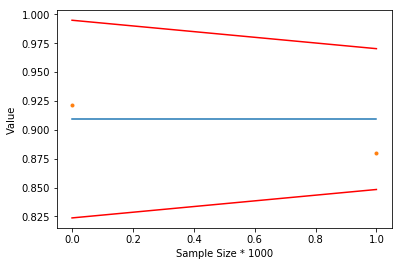

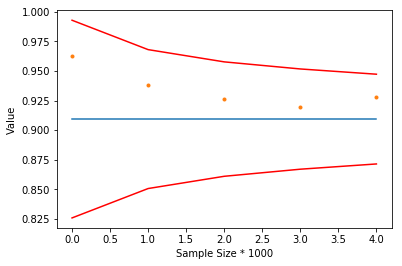

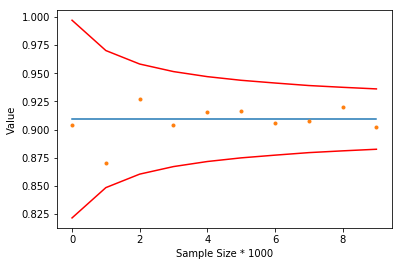

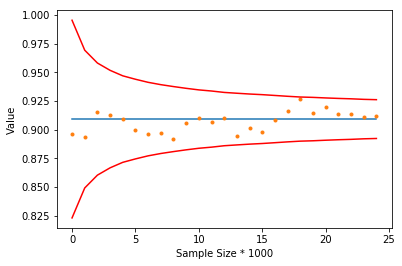

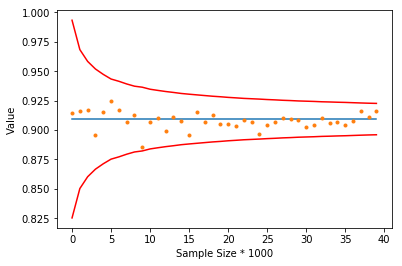

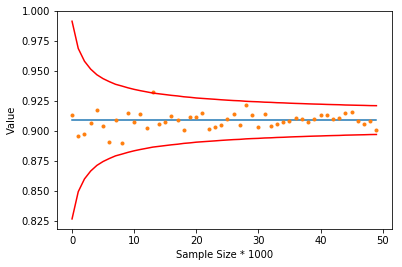

In [9]:
np.random.seed(0)

sample_sizes = [2000,5000,10000,25000,40000,50000]

# Now we will write a loop that consist of the above sample size

for sample_size in sample_sizes:
    msin_est = [None] * int(sample_size / 1000)
    msin_std = [None] * int(sample_size / 1000)

    for i in range(1,int(sample_size / 1000) + 1):

        unif_array = uniform.rvs(size = i * 1000) * 2
        cos_val = np.cos(unif_array) * 2
        msin_est [i - 1] = np.mean(cos_val)
        msin_std [i - 1] = np.std(cos_val)/np.sqrt(i*1000)

    analytical_solution = np.sin(2) - np.sin(0)

    plt.plot([analytical_solution]* int(sample_size / 1000))
    plt.plot(msin_est, '.')
    plt.plot(analytical_solution + np.array(msin_std)*3, 'r')
    plt.plot(analytical_solution - np.array(msin_std)*3, 'r')
    plt.xlabel("Sample Size * 1000")
    plt.ylabel("Value")
    plt.show()

# Question 2

In this problem, you will be required to implement code which prices a European put option. Use the following information for pricing:


 - Share volatility is 30%

 - The risk-free rate is 10%

 - Average share return is 15%

 - The current share price is $100

 - The strike on the European put option is $110
 
 - The term of the contract is 6 months

1. Write a function which takes a risk-free rate, the initial share price, the share volatility, and term as inputs, and determines the terminal value of a share price, assuming geometric Brownian Motion. Note, you should vectorize this function where possible.

2. Write a function which takes terminal share prices, a strike price, a risk-free rate and term as inputs, and gives out the discounted value of a European put option.

3. Write a for loop which cycles through sample size (1000, 2000, ..., 50000), and calculates the Monte Carlo estimate of a European put option, and well as the standard deviation of the Monte Carlo estimator.

4. Plot the Monte Carlo estimates, the analytical European put option value, and three standard deviation error bounds.

In [ ]:
# import math
import math

In [ ]:
# Initialize the variable
sigma = 0.3
r = 0.1
S_0 = 100

K = 110
T = 180
T_0 = 0


# 1. Terminal value of a share price Function

In [ ]:
def terminal_shareprice(S_0, r, sigma, Z, T):
    """Generates the terminal share price given some random normal values, Z"""
    a = r - sigma**2 / 2
    b = sigma * np.sqrt(T) * Z
    c = np.exp(a * T + b)
    result = S_0 * c
    return result

# 2. Discounted value price

In [ ]:
def discounted_puy_payoff(S_T, K, r, T):
    """Function for evaluating the discounted payoff of put in Monte Carlo Estimation"""
    a = np.exp(-r * T)
    b = np.maximum(K - S_T,0)
    result = a * b
    return result

# 3 + 4.

In [ ]:
# Function to calculate d_1 and d_2
def d_1_calculate(S_0,K,r,sigma,T):
    """Function for d_1 calculation"""
    a = math.log(S_0/K)
    b = (r + (sigma**2 / 2)) * T
    c = sigma * math.sqrt(T)
    result = (a + b) / c
    return result

def d_2_calculate(d_1,sigma,T):
    a = sigma * math.sqrt(T)
    result = d_1 - a
    return result

# Function for Analytical Solution
def analytic_putprice_calculate(S_0,d_1,d_2,K,r,T):
    a = -S_0 * norm.cdf(-d_1)
    b = norm.cdf(-d_2) * K * math.exp(-r * T)
    result = a + b
    return result

In [ ]:
## Implement Monte Carlo Algorithm

#np.random.seed(0)

sample_sizes = [2000,5000,10000,25000,40000,50000]

for sample_size in sample_sizes:

    a = int(sample_size / 1000)

    mput_est = [None] * a
    mput_std = [None] * a

    for i in range(1,a + 1):
        norm_array = norm.rvs(size = 1000 * i)
        term_val = terminal_shareprice(S_0,r,sigma,norm_array,T-T_0)
        mput_val = discounted_puy_payoff(term_val, K, r, T-T_0)
        mput_est [i - 1] = np.mean(mput_val)
        mput_std [i - 1] = np.std(mput_val)/np.sqrt(i*1000)

    # Analytical Solution
    d_1 = d_1_calculate(S_0,K,r,sigma,T)
    d_2 = d_2_calculate(d_1,sigma,T)
    analytical_solution = analytic_putprice_calculate(S_0,d_1,d_2,K,r,T)

    # Plot
    plt.plot([analytical_solution]* a)
    plt.plot(mput_est, '.')
    plt.plot(analytical_solution + np.array(mput_std)*3, 'r')
    plt.plot(analytical_solution - np.array(mput_std)*3, 'r')
    plt.xlabel("Sample Size * 1000")
    plt.ylabel("Value")
    plt.show()